In [14]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

In [6]:
data = pd.read_csv('olist_products_dataset.csv')
data

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [8]:
data = pd.read_csv('olist_products_dataset.csv')
data['product_volume_cm3'] = data['product_length_cm'] * data['product_width_cm'] * data['product_height_cm']
data

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_volume_cm3
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,2240.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,10800.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,2430.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,2704.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,4420.0
...,...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0,64000.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0,4864.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0,5103.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0,8060.0


In [9]:
data.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
product_volume_cm3              2
dtype: int64

In [11]:
data.dropna(subset = ['product_volume_cm3'], inplace = True)
data.isna().sum()

product_id                      0
product_category_name         609
product_name_lenght           609
product_description_lenght    609
product_photos_qty            609
product_weight_g                0
product_length_cm               0
product_height_cm               0
product_width_cm                0
product_volume_cm3              0
dtype: int64

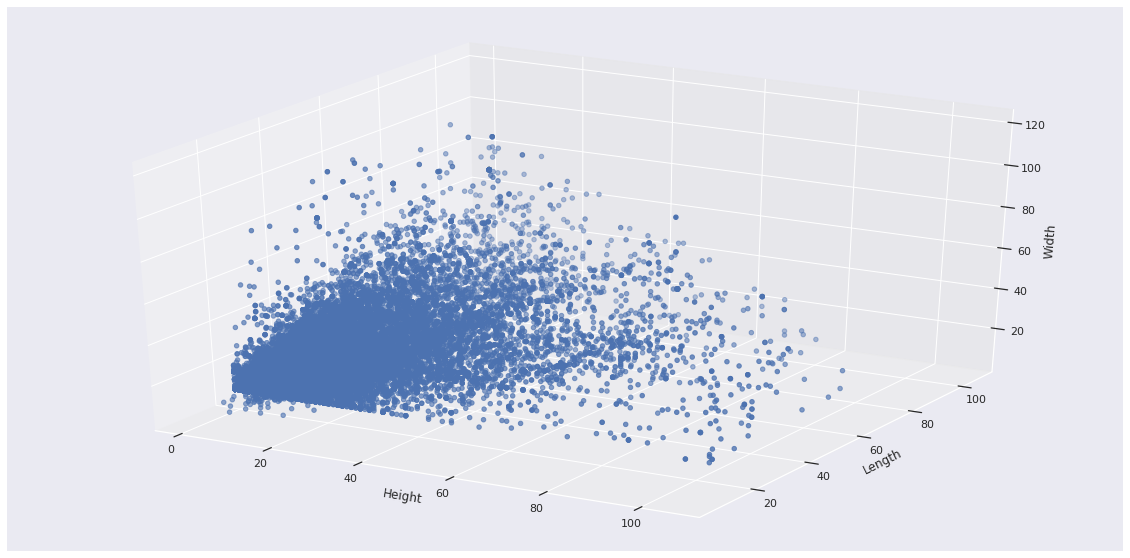

In [16]:
threedee = plt.figure(figsize=(20,10)).gca(projection='3d')
threedee.scatter(data['product_height_cm'], data['product_length_cm'], data['product_width_cm'])
threedee.set_xlabel('Height')
threedee.set_ylabel('Length')
threedee.set_zlabel('Width')
plt.show()

In [18]:
dfa = data[['product_height_cm','product_length_cm','product_width_cm']]
print('Total Row : ', len(dfa))
sc_dfa = StandardScaler()
dfa_std = sc_dfa.fit_transform(dfa.astype(float))

Total Row :  32949


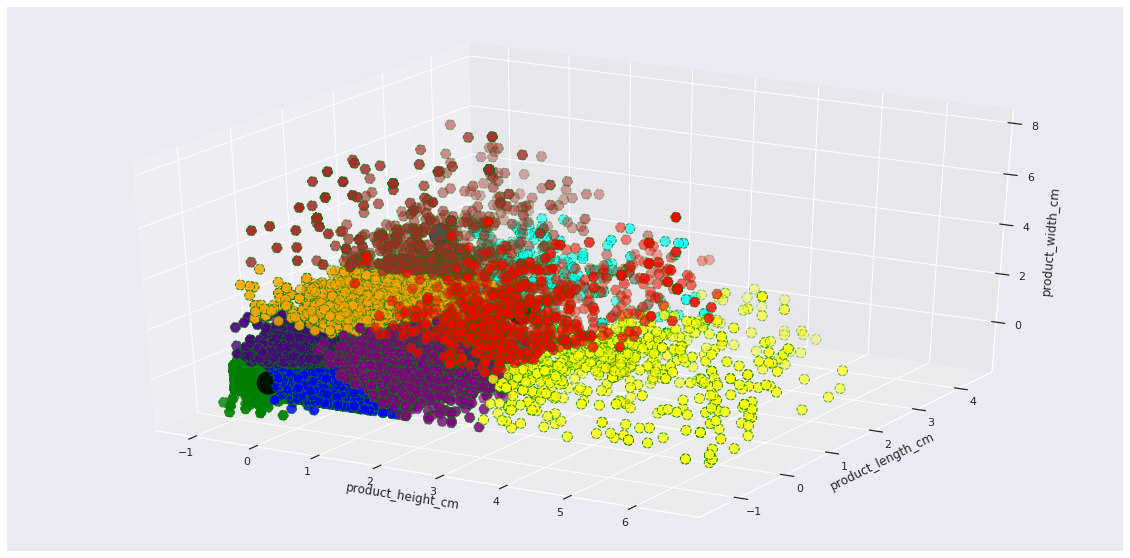

In [20]:
kmeans = KMeans(n_clusters=10, random_state=42).fit(dfa_std)
labels = kmeans.labels_
new_dfa = pd.DataFrame(data = dfa_std, columns = ['product_height_cm','product_length_cm','product_width_cm'])
new_dfa['label_kmeans'] = labels
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(new_dfa.product_height_cm[new_dfa.label_kmeans == 0], new_dfa['product_length_cm'][new_dfa.label_kmeans == 0], new_dfa['product_width_cm'][new_dfa.label_kmeans == 0], c='blue', s=100, edgecolor='green',linestyle='dashed', label='Cluster 1')
ax.scatter(new_dfa.product_height_cm[new_dfa.label_kmeans == 1], new_dfa['product_length_cm'][new_dfa.label_kmeans == 1], new_dfa['product_width_cm'][new_dfa.label_kmeans == 1], c='red', s=100, edgecolor='green',linestyle='dashed', label='Cluster 2')
ax.scatter(new_dfa.product_height_cm[new_dfa.label_kmeans == 2], new_dfa['product_length_cm'][new_dfa.label_kmeans == 2], new_dfa['product_width_cm'][new_dfa.label_kmeans == 2], c='green', s=100, edgecolor='green',linestyle='dashed', label='Cluster 3')
ax.scatter(new_dfa.product_height_cm[new_dfa.label_kmeans == 3], new_dfa['product_length_cm'][new_dfa.label_kmeans == 3], new_dfa['product_width_cm'][new_dfa.label_kmeans == 3], c='orange', s=100, edgecolor='green',linestyle='dashed', label='Cluster 4')
ax.scatter(new_dfa.product_height_cm[new_dfa.label_kmeans == 4], new_dfa['product_length_cm'][new_dfa.label_kmeans == 4], new_dfa['product_width_cm'][new_dfa.label_kmeans == 4], c='purple', s=100, edgecolor='green',linestyle='dashed', label='Cluster 5')
ax.scatter(new_dfa.product_height_cm[new_dfa.label_kmeans == 5], new_dfa['product_length_cm'][new_dfa.label_kmeans == 5], new_dfa['product_width_cm'][new_dfa.label_kmeans == 5], c='cyan', s=100, edgecolor='green',linestyle='dashed', label='Cluster 5')
ax.scatter(new_dfa.product_height_cm[new_dfa.label_kmeans == 6], new_dfa['product_length_cm'][new_dfa.label_kmeans == 6], new_dfa['product_width_cm'][new_dfa.label_kmeans == 6], c='indigo', s=100, edgecolor='green',linestyle='dashed', label='Cluster 6')
ax.scatter(new_dfa.product_height_cm[new_dfa.label_kmeans == 7], new_dfa['product_length_cm'][new_dfa.label_kmeans == 7], new_dfa['product_width_cm'][new_dfa.label_kmeans == 7], c='yellow', s=100, edgecolor='green',linestyle='dashed', label='Cluster 7')
ax.scatter(new_dfa.product_height_cm[new_dfa.label_kmeans == 8], new_dfa['product_length_cm'][new_dfa.label_kmeans == 8], new_dfa['product_width_cm'][new_dfa.label_kmeans == 8], c='lime', s=100, edgecolor='green',linestyle='dashed', label='Cluster 8')
ax.scatter(new_dfa.product_height_cm[new_dfa.label_kmeans == 9], new_dfa['product_length_cm'][new_dfa.label_kmeans == 9], new_dfa['product_width_cm'][new_dfa.label_kmeans == 9], c='brown', s=100, edgecolor='green',linestyle='dashed', label='Cluster 9')

centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], c='black', s=500);
plt.xlabel('product_height_cm')
plt.ylabel('product_length_cm')
ax.set_zlabel('product_width_cm')
plt.show()